In [1]:
# Dependencies and Setup
import pandas as pd


import matplotlib.pyplot as plt
import scipy.stats as st
pd.set_option("display.precision", 2)
import numpy as np
from scipy import stats
import os
import datetime as dt
import random
from scipy.stats import linregress
import scipy.stats as stats
import seaborn as sns


In [2]:
#set working directory
os.chdir("C://Users//ksaville//Desktop/NFL-Betting-Analysis/")
os.getcwd()
nfl = pd.read_csv("raw_data/spreadspoke_scores.csv")

# Scatter plot function

In [3]:
#make a scatter plot for home and away scores as a function of temperature and wind speed.
# use function for making scatter plots
#Define function for making  scatter plots

def make_scatter_plot(df, x_col, y_col):
    "This creates a scatter plot given a list of x values, y values, x label, y label and title, retunrs plt" 
    
    x = df[x_col]
    y = df[y_col]
    
    fig = plt.figure(figsize =(20, 10)) 
  
    
    #generating random number to be included in fig name so that new figure is unlikely to 
    #be named the same as a previous figure 
    
    #fig_num = random.randint(1, 100)

    plt.scatter(x, y)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} as a function of {x_col}")
    plt.ylim(min(y)-10,max(y)+10)
    plt.savefig(f"{x_col}_{y_col}.png")
   
    linregress(x,y)
    reg = linregress(x,y)
    reg_line = reg[0]*x + reg[1]

    plt.plot(x,reg_line, color="red")
    r_squared = round(reg[2]**2,2)
    print(f"r squared = {r_squared}")
    
    return plt



# Introduction:  

The data for this analysis was obtained from https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data.  Below is the desription of this data from Kaggle.

National Football League (NFL) game results since 1966 with betting odds information since 1979. Dataset was created from a variety of sources including games and scores from a variety of public websites such as ESPN, NFL.com, and Pro Football Reference. Weather information is from NOAA data with NFLweather.com a good cross reference. Betting data was used from http://www.repole.com/sun4cast/data.html for 1978-2013 seasons. Pro-football-reference.com data was then cross referenced for betting lines and odds as well as weather data. From 2013 on betting data reflects lines available at sportsline.com.

Our goal is to investigate the performance of teams relative to the betting spread and over/under line as well as to investigate the potential effects of weather on overall scoring.

# Exploring the Data

In [4]:
nfl.shape

#shows there are 17 columns and 12934 rows of data

(12934, 17)

In [5]:
nfl.head()

#Shows that the first games were from 1966.  (note: Betting info is only available starting in 1979)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN


In [6]:
nfl.columns
# shows the names of all the columns

Index(['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'score_home', 'score_away', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium',
       'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'weather_detail'],
      dtype='object')

In [7]:
#Check data types
nfl.dtypes
# Note - schedule date, week, over_under line, and humidity are object type.  
# May need to change this to date format in subsequent analyses

schedule_date           object
schedule_season          int64
schedule_week           object
schedule_playoff          bool
team_home               object
score_home             float64
score_away             float64
team_away               object
team_favorite_id        object
spread_favorite        float64
over_under_line         object
stadium                 object
stadium_neutral           bool
weather_temperature    float64
weather_wind_mph       float64
weather_humidity        object
weather_detail          object
dtype: object

In [8]:
#check to see of there are null values in the data
nfl.isnull().sum()
# yes there are:  137 in score_home and score_away, 
#2616 in team favorite, spread favorite
#2626 in over_under.This probably reflects that betting data wasn't included before 1979
# not sure about the 2626 vs 2616 discrepancy
# 926 in weather_temp, weather_wind
#4546 in humidity
#10233 in weather_detail (this means rain, snow, fog, etc.)

#Drop nas
nfl = nfl.dropna(subset=['weather_temperature', 'weather_wind_mph', 'score_home', 'score_away'])
print(nfl.isnull().sum())

schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home                 0
score_home                0
score_away                0
team_away                 0
team_favorite_id       2249
spread_favorite        2249
over_under_line        2259
stadium                   0
stadium_neutral           0
weather_temperature       0
weather_wind_mph          0
weather_humidity       3584
weather_detail         9297
dtype: int64


In [9]:
#Check out some basic statistics
nfl.describe()

,schedule_season,score_home,score_away,spread_favorite,weather_temperature,weather_wind_mph
count,11972.00,11972.00,11972.00,9723.00,11972.00,11972.00
mean,1994.56,22.31,19.58,-5.36,58.66,7.83
std,14.93,10.53,10.14,3.43,15.53,5.64
min,1966.00,0.00,0.00,-26.50,-6.00,0.00
25%,1982.00,14.00,13.00,-7.00,48.00,3.75
50%,1996.00,21.00,20.00,-4.50,61.00,8.00
75%,2007.00,29.00,27.00,-3.00,72.00,12.00
max,2020.00,72.00,62.00,0.00,97.00,40.00


In [ ]:
# Clean data.  Change data types to correct format etc.

In [11]:
#convert schedule_date to date format
nfl['schedule_date']=pd.to_datetime(nfl['schedule_date'])

# convert over_under line to float
nfl["over_under_line"] = pd.to_numeric(nfl["over_under_line"], errors='coerce')


In [12]:
#change data frame to only games after 1979

nfl_1979 = nfl[nfl['schedule_season']>= 1979]

# remove humidity column
del nfl_1979['weather_humidity']

#rename all team names to team_ids.  combining names for teams that have changed cities.

nfl_1979 = nfl_1979.replace({'Arizona Cardinals':'ARI',
'Phoenix Cardinals':'ARI',
'St. Louis Cardinals':'ARI',
'Atlanta Falcons':'ATL',
'Baltimore Ravens':'BAL',
'Buffalo Bills':'BUF',
'Carolina Panthers':'CAR',
'Chicago Bears':'CHI',
'Cincinnati Bengals': 'CIN',
'Cleveland Browns':'CLE',
'Dallas Cowboys':'DAL',
'Denver Broncos':'DEN',
'Detroit Lions':'DET',
'Green Bay Packers':'GB',
'Houston Texans':'HOU',
'Baltimore Colts':'IND',
'Indianapolis Colts':'IND',
'Jacksonville Jaguars':'JAX',
'Kansas City Chiefs':'KC',
'Los Angeles Chargers':'LAC',
'San Diego Chargers':'LAC',
'Los Angeles Rams':'LAR',
'St. Louis Rams':'LAR',
'Miami Dolphins':'MIA',
'Minnesota Vikings':'MIN',
'New England Patriots':'NE',
'Boston Patriots':'NE',
'New Orleans Saints':'NO',
'New York Giants':'NYG',
'New York Jets':'NYJ',
'Los Angeles Raiders':'OAK',
'Oakland Raiders':'OAK',
'Philadelphia Eagles':'PHI',
'Pittsburgh Steelers':'PIT',
'Seattle Seahawks':'SEA',
'San Francisco 49ers':'SF',
'Tampa Bay Buccaneers':'TB',
'Houston Oilers':'TEN',
'Tennessee Oilers':'TEN',
'Tennessee Titans':'TEN',
'Washington Football Team':'WAS',
'Washington Redskins':'WAS'})

nfl_1979 = nfl_1979.reset_index()
del nfl_1979['index']

#nfl_1979.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_detail
0,1979-09-01,1979,1,False,TB,31.0,16.0,DET,TB,-3.0,30.0,Houlihan's Stadium,False,79.0,9.0,NaN
1,1979-09-02,1979,1,False,BUF,7.0,9.0,MIA,MIA,-5.0,39.0,Ralph Wilson Stadium,False,74.0,15.0,NaN
2,1979-09-02,1979,1,False,CHI,6.0,3.0,GB,CHI,-3.0,31.0,Soldier Field,False,78.0,11.0,NaN
3,1979-09-02,1979,1,False,DEN,10.0,0.0,CIN,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,NaN
4,1979-09-02,1979,1,False,KC,14.0,0.0,IND,KC,-1.0,37.0,Arrowhead Stadium,False,76.0,8.0,NaN


In [ ]:
# Factors Affecting Scoring

## Is here a home field advantage?

In [13]:
# collect score data from data frames
scores = [nfl['score_home'], nfl['score_away']]
scores_1979 = [nfl_1979['score_home'], nfl_1979['score_away']]
combined = scores + scores_1979

In [14]:
#compare means and do a t-test

home_mean_all = round(np.mean(nfl["score_home"]),2)
away_mean_all = round(np.mean(nfl["score_away"]),2)
home_mean_1979 = round(np.mean(nfl_1979["score_home"]),2)
away_mean_1979 = round(np.mean(nfl_1979["score_away"]),2)
diff_all = round(home_mean_all - away_mean_all,2)
diff_1979 = round(home_mean_1979 - away_mean_1979,2)

print(f'Home mean score All time = {home_mean_all}; Away mean score all time = {away_mean_all}')
print(f'The difference in means is:  {diff_all}')
print(f'Home mean score since 1979 = {home_mean_1979}; Away mean score since 1979 = {away_mean_1979}')
print(f'The difference in means is:  {diff_1979}')

print("Is this a significant difference?")
t_test_all_time = stats.ttest_ind(nfl['score_home'], nfl['score_away'])
t_test_1979 = stats.ttest_ind(nfl_1979['score_home'], nfl['score_away'])
print("Yes the mean diff is significant for bothe comparisons")
print(f"t-test, all time = {t_test_all_time}")
print(f"t-test, 1979 + = {t_test_1979}")

Home mean score All time = 22.31; Away mean score all time = 19.58
The difference in means is:  2.73
Home mean score since 1979 = 22.62; Away mean score since 1979 = 19.92
The difference in means is:  2.7
Is this a significant difference?
Yes the mean diff is significant for bothe comparisons
t-test, all time = Ttest_indResult(statistic=20.415923692736587, pvalue=7.317583609443472e-92)
t-test, 1979 + = Ttest_indResult(statistic=21.74827184611172, pvalue=9.229699549242454e-104)


Text(3, 67.0, 'T-test p value = 7.3^-104')

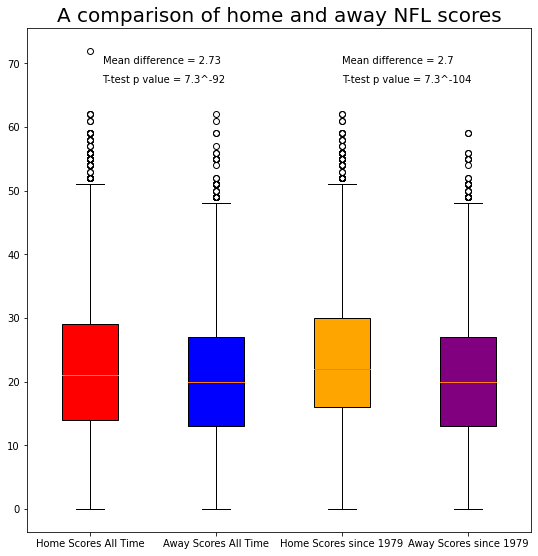

In [15]:
#Make a boxplot for away scores and home scores (after nulls have been dropped)

fig = plt.figure(figsize =(7, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
bp = ax.boxplot(combined, patch_artist = True, )
colors = ['red', 'blue', 'orange', 'purple' ]
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

        # fill with colors -

ax.set_xticklabels(['Home Scores All Time', 'Away Scores All Time', 'Home Scores since 1979', 'Away Scores since 1979'], fontsize =10) 

plt.title("A comparison of home and away NFL scores", fontsize = 20) 
plt.text(1.1, 70.0, 'Mean difference = 2.73')
plt.text(1.1, 67.0, 'T-test p value = 7.3^-92')
plt.text(3, 70.0, 'Mean difference = 2.7')
plt.text(3, 67.0, 'T-test p value = 7.3^-104')
#plt.savefig('scores_boxplot.png')


In [ ]:
## Does weather affect scoring?

r squared = 0.06


Text(0.5, 69.0, 'Temperature (F)')

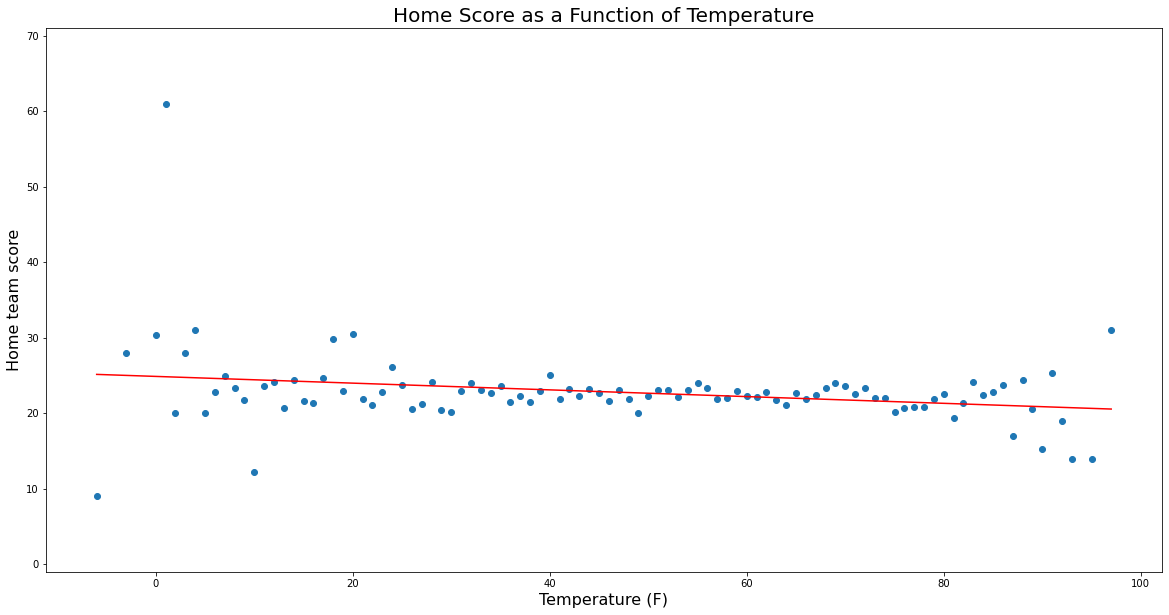

In [16]:
#Add away and home scores to create total column.  Use this for over uder analysis etc.
nfl_1979['Total'] = nfl_1979['score_home'] + nfl_1979['score_away']

#group by temp to see affect on scoring
gby_temp = nfl_1979.groupby(['weather_temperature'])

scores_home_weather_df = gby_temp['score_home'].mean()
scores_away_weather_df = gby_temp['score_away'].mean()
scores_total_weather_df = gby_temp['Total'].mean()

scores_home_weather_df = scores_home_weather_df.reset_index()
scores_away_weather_df = scores_away_weather_df.reset_index()
scores_total_weather_df = scores_total_weather_df.reset_index()

#scores_total_weather_df.columns

make_scatter_plot(scores_home_weather_df, 'weather_temperature', 'score_home')
plt.title('Home Score as a Function of Temperature', fontsize = 20)
plt.ylabel('Home team score', fontsize = 16)
plt.xlabel('Temperature (F)', fontsize = 16)


r squared = 0.14


Text(0.5, 69.0, 'Temperature (F)')

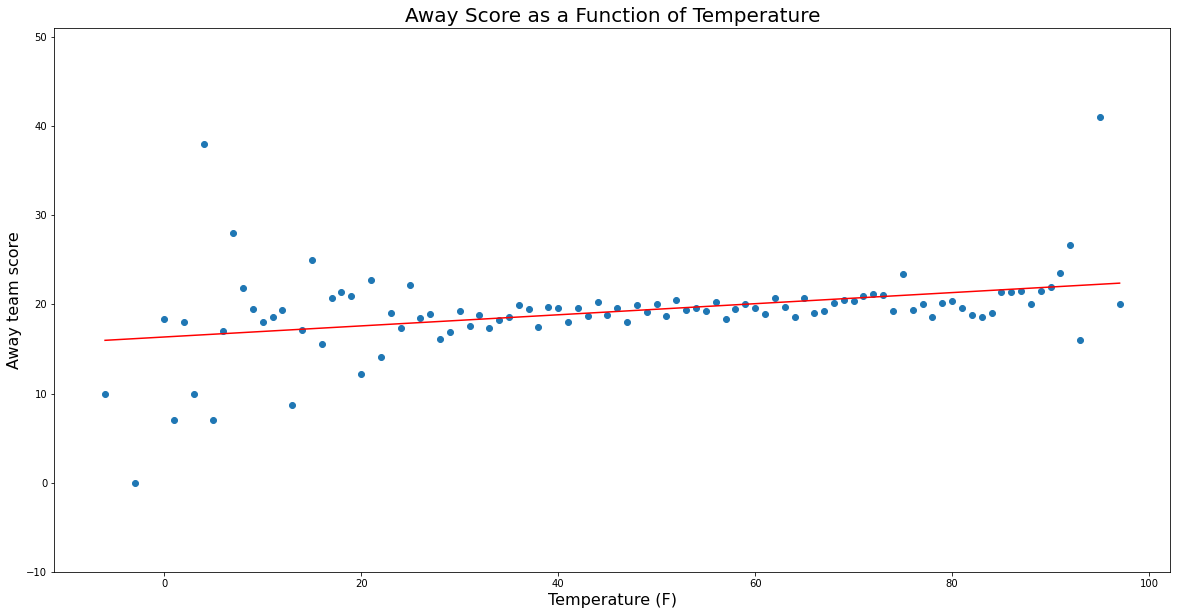

In [17]:
make_scatter_plot(scores_away_weather_df, 'weather_temperature', 'score_away')
plt.title('Away Score as a Function of Temperature', fontsize = 20)
plt.ylabel('Away team score', fontsize = 16)
plt.xlabel('Temperature (F)', fontsize = 16)

r squared = 0.01


Text(0.5, 69.0, 'Temperature (F)')

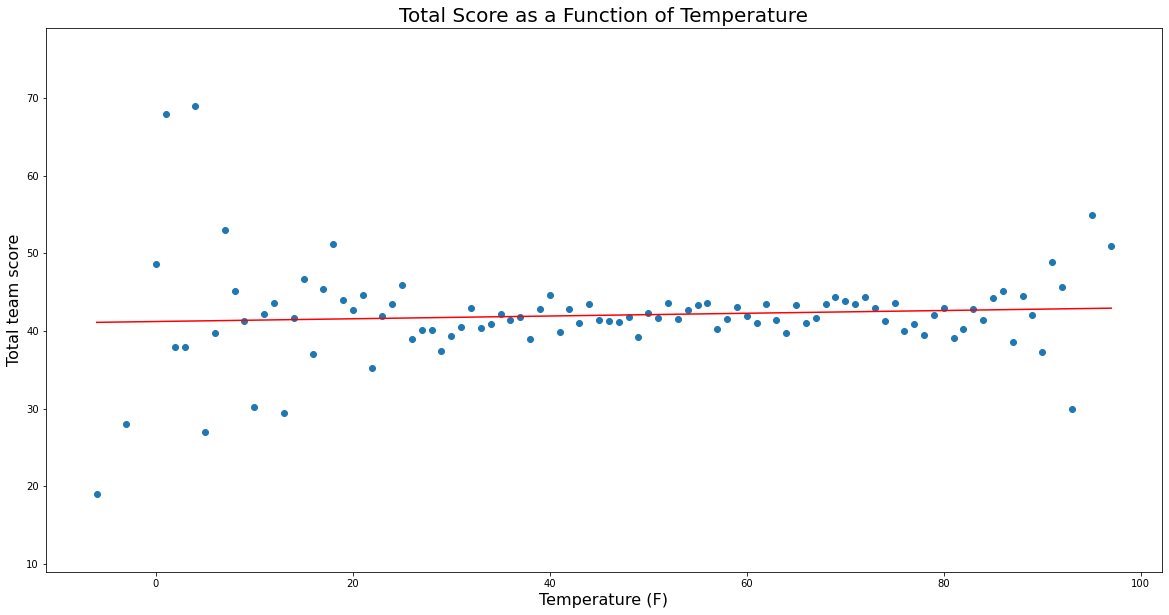

In [18]:
make_scatter_plot(scores_total_weather_df, 'weather_temperature', 'Total')
plt.title('Total Score as a Function of Temperature', fontsize = 20)
plt.ylabel('Total team score', fontsize = 16)
plt.xlabel('Temperature (F)', fontsize = 16)

# Over/Under Analysis

In [30]:
#calculate number of games that were over or under the over_under line. 
for index, row in nfl_1979.iterrows():
    total = row[14]
    line = row[10]
    if total > line:
        nfl_1979.loc[index,'OverUnder'] = 'over'
    elif total < line:
        nfl_1979.loc[index,'OverUnder'] = 'under'
    else:
        nfl_1979.loc[index,'OverUnder'] = 'push'

#nfl_1979.head()

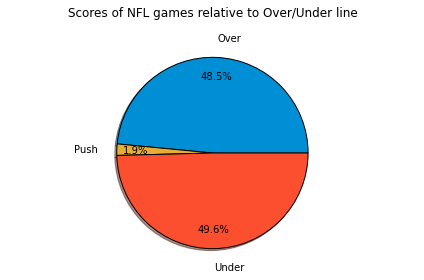

In [31]:
#Groupby overunder column and get counts for plotting.  Count of 'team home' column could have een any column.

gby_OU = nfl_1979.groupby('OverUnder')

over_under_count = gby_OU['team_home'].count()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Over', 'Push', 'Under']
sizes = over_under_count
colors = ['#008fd5', '#e5ae37', '#fc4f30']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=360, wedgeprops={'edgecolor':'black'}, colors=colors,
        pctdistance = 0.8, labeldistance = 1.2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Scores of NFL games relative to Over/Under line', pad =30)
plt.tight_layout()
#plt.style.use("seaborn-colorblind") - this didn't seem to make a difference

plt.savefig("over_under_pie.png")
plt.show()


In [23]:
# calc performance against spread:
#fav team points - other team points

#example using first game 
#(det vs TB, TB favored by 3, score: score_home 31.0, score_away 16.0  )


# record cover as win, lose , push
for index, row in nfl_1979.iterrows():
    home_team = row[4]
    away_team = row[7]
    fav_team = row[8]
    home_score = row[5]
    away_score = row[6]
    spread = row[9]
    if home_team == fav_team:
        fav_score = home_score + spread
        diff = fav_score - away_score
    elif away_team == fav_team:
        fav_score = away_score + spread
        diff = fav_score - home_score
    
    nfl_1979.loc[index,'Spread Diff'] = diff
    if diff > 0:
        nfl_1979.loc[index,'Cover'] = 'yes'
    elif diff < 0:
        nfl_1979.loc[index,'Cover'] = 'no'
    else:
        nfl_1979.loc[index,'Cover'] = 'push'
    

In [24]:
#deleted stadium_neutral and weather_detail columns
nfl_1979.columns
del(nfl_1979['stadium_neutral'])
del(nfl_1979['weather_detail'])

In [25]:
#trying to filter out covered from not covered etc.

nfl_1979.head()

nfl_year_cover = nfl_1979[['schedule_season','team_home','team_away', 'Cover']]
nfl_year_cover_home = nfl_1979[['schedule_season','team_home', 'Cover']]
nfl_year_cover_away = nfl_1979[['schedule_season','team_away', 'Cover']]

nfl_year_cover.groupby(['schedule_season','team_home'])['Cover'].value_counts()


#nfl_home_covered = nfl_year_cover_home[nfl_year_cover_home['Cover']=='yes']
#nfl_home_not_covered = nfl_year_cover_home[nfl_year_cover_home['Cover']=='no']
#nfl_home_push = nfl_year_cover_home[nfl_year_cover_home['Cover']=='push']

#nfl_away_covered = nfl_year_cover_away[nfl_year_cover_away['Cover']=='yes']
#nfl_away_not_covered = nfl_year_cover_away[nfl_year_cover_away['Cover']=='no']
#nfl_away_push = nfl_year_cover_away[nfl_year_cover_away['Cover']=='push']

#nfl_home_covered['team_home'].value_counts()

schedule_season  team_home  Cover
1979             ARI        no       6
                            yes      2
                 ATL        yes      6
                            no       1
                            push     1
                                    ..
2020             IND        yes      2
                            no       1
                 MIN        no       3
                 NO         no       3
                            yes      1
Name: Cover, Length: 2673, dtype: int64

In [26]:
   
    home_records = {}
    away_records = {}
    
    for index, row in nfl_1979.iterrows():
        home_team = row[4]
        away_team = row[7]
        fav_team = row[8]
        cover = row[17]
    
        if home_team == fav_team:
            if home_team not in home_records:
                home_records[home_team] = [0,0,0] 
         
            if cover == 'yes':
                home_records[home_team][0] += 1 
            
            if cover == 'no':
                home_records[home_team][1] += 1 
            
            if cover == 'push':
                home_records[home_team][2] += 1 
                
        if away_team == fav_team:
            if away_team not in away_records:
                away_records[away_team] = [0,0,0] 
         
            if cover == 'yes':
                away_records[away_team][0] += 1 
            
            if cover == 'no':
                away_records[away_team][1] += 1 
            
            if cover == 'push':
                away_records[away_team][2] += 1 
            
            
home_records_df = pd.DataFrame(home_records).T
    
away_records_df = pd.DataFrame(away_records).T
    
home_records_df.columns = ['Home covered', 'Home not covered', 'Home pushed']
    
away_records_df.columns = ['Away covered', 'Away not covered', 'Away pushed']

home_records_df.sort_index(inplace = True)

cover_records_joined = home_records_df.join(away_records_df, on=None, how='left', lsuffix='', rsuffix='', sort=False)


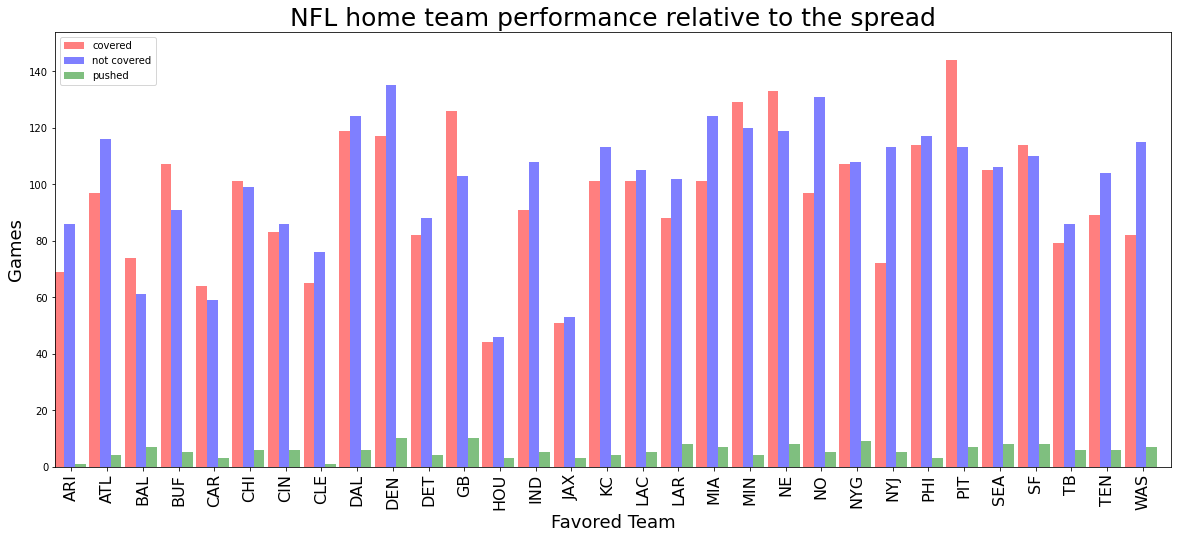

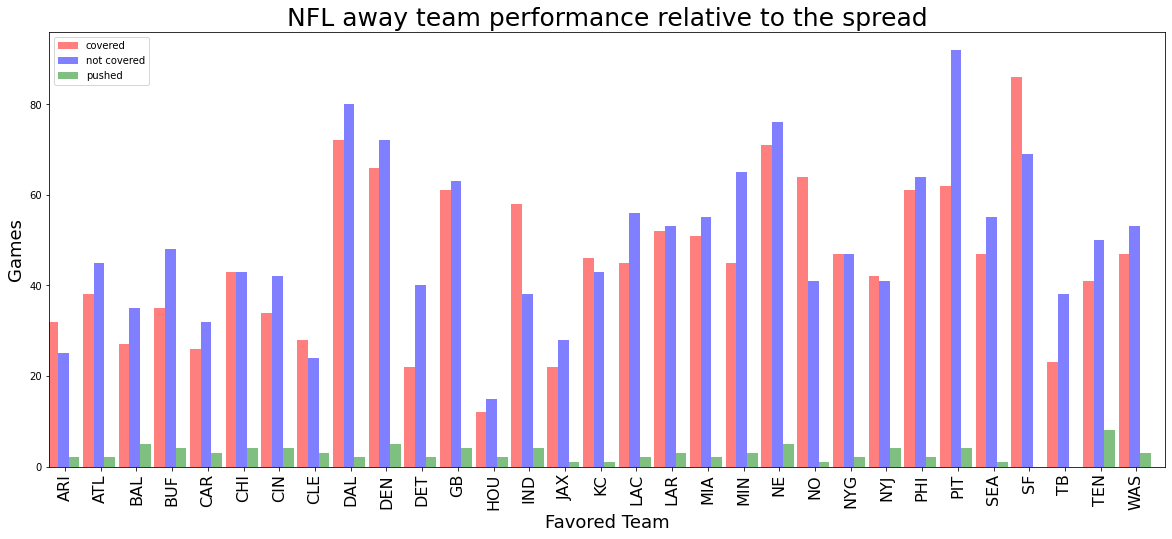

In [27]:
# Making barplots showing covered, not covered and pushed values pertainng to score 
#relative to the betting spread for favorite team, home and away
labels = cover_records_joined.index
df = cover_records_joined

# Set x axis and tick locations
x_axis = np.arange(len(labels))
tick_locations = [value+0.2 for value in x_axis]

#set fig size, x-axis, y
plt.figure(figsize=(20,8))

width = 0.3
#plot covered data
plt.bar(x_axis - width, df['Home covered'],width = width, color='r', alpha=0.5, align="edge", label = 'covered')
plt.xticks(tick_locations, df.index, rotation="vertical", fontsize=16)

plt.bar(x_axis, df['Home not covered'],width = width, color='b', alpha=0.5, align="edge", label = 'not covered')
plt.xticks(tick_locations, df.index, rotation="vertical")

plt.bar(x_axis + width, df['Home pushed'],width = width, color='g', alpha=0.5, align="edge", label = 'pushed')
plt.xticks(tick_locations, df.index, rotation="vertical")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(df["Home covered"])+10)

# Set a Title and labels
plt.title("NFL home team performance relative to the spread", fontdict = {'fontsize' : 25})
plt.xlabel("Favored Team", fontdict = {'fontsize' : 18})
plt.ylabel("Games",  fontdict = {'fontsize' : 18})

plt.legend(loc = 'upper left')
plt.savefig('home_cover_bar.png')
plt.show()


#plot away covered data

# Set x axis and tick locations
x_axis = np.arange(len(labels))
tick_locations = [value+0.2 for value in x_axis]

#set fig size, x-axis, y
plt.figure(figsize=(20,8))

width = 0.3

df = cover_records_joined

plt.bar(x_axis - width, df['Away covered'],width = width, color='r', alpha=0.5, align="edge", label = 'covered')
plt.xticks(tick_locations, df.index, rotation="vertical", fontsize = 16)

plt.bar(x_axis, df['Away not covered'],width = width, color='b', alpha=0.5, align="edge", label = 'not covered')
plt.xticks(tick_locations, df.index, rotation="vertical")

plt.bar(x_axis + width, df['Away pushed'],width = width, color='g', alpha=0.5, align="edge", label = 'pushed')
plt.xticks(tick_locations, df.index, rotation="vertical",)

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(df["Away covered"])+10)

# Set a Title and labels
plt.title("NFL away team performance relative to the spread", fontdict = {'fontsize' : 25})
plt.xlabel("Favored Team", fontdict = {'fontsize' : 18})
plt.ylabel("Games",  fontdict = {'fontsize' : 18})

plt.legend(loc = 'upper left')
plt.savefig('away_cover_bar.png')
plt.show()
